In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import random
import pandas as pd
import matplotlib as mpt

%matplotlib inline

# We first try out a system with 4 states. 

#Transition Matrix P 
P = [[0, 0.3, 0.6, 0.1], [0.25, 0, 0.7, 0.05], [0.4, 0.1, 0, 0.5], [0.3, 0.1, 0.6, 0]]
P = np.array(P)

#Array of Holding Times
H  = [[3, 0, 0, 0], [0, 4, 0, 0], [0, 0, 5, 0], [0, 0, 0, 6]]
H = np.array(H)

#Q-matrix of transitions
Q = H @ P - H

#rate of max flow C
c = 0.5

#rates of compute nodes 1 and 2
r1 = 0.4
r2 = 1.3

#matrix of activation states 
A = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])

#rates at each state
R = (A @ np.array([[r1], [r2]])) - c 

#time interval
dt = 0.1

#time vector storing t values in the range [0,200] with interval length dt
time = [x*dt for x in range(math.floor(200/dt))]

#function to determine the next interval length 
def switchtime(l):
    expFunc = np.vectorize(np.random.exponential)
    rateMax = np.vectorize(np.maximum)
    maxQ = rateMax(Q[l-1, :], 0)
    expOutputs = expFunc(scale = maxQ)
    expOutputs[l-1] = np.amin(expOutputs) + 1
    output = [np.amin(expOutputs), np.argmin(expOutputs) + 1]
    return output


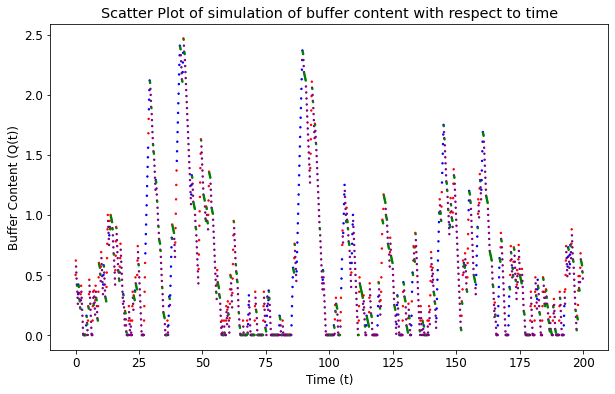

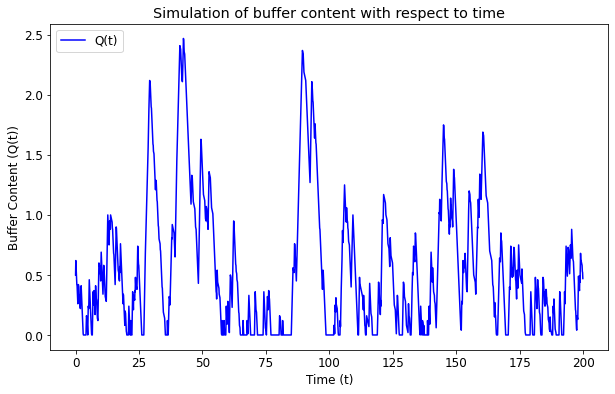

In [3]:
#initialize the Qt vector which stores the buffer content values (Q(t)) to all zeros
Qt = [0]*(math.floor(200/dt))
Qt_state = [0]*(math.floor(200/dt))

#initial buffer content 
Qt[0] = 0.5
Qt_state[0] = 0

#a function that returns the rate of change of the buffer content according to the current state
def rate(i):
    return R[i-1]

#assume the state at t=0 is state 1 and then simulate buffer capacity at different points in time
i = 1
state = 1
next_state = 1
switchPoint, next_state = switchtime(state)
while i < math.floor(200/dt):
    if switchPoint > 0:
        Qt[i] = max(Qt[i-1] + rate(state) * dt, 0)
        Qt_state[i] = state - 1
        switchPoint = switchPoint - dt
        i = i + 1
    else:
        state = next_state
        switchPoint, next_state = switchtime(state)
        
#plot the simulated buffer content
colors = ['red','green','blue','purple']
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(time, Qt, c=Qt_state, cmap=mpt.colors.ListedColormap(colors), s=2)
ax.set_xlabel('Time (t)')
ax.set_ylabel('Buffer Content (Q(t))')
ax.set_title('Scatter Plot of simulation of buffer content with respect to time')


#plot the simulated buffer content
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(time, Qt, color='b', label='Q(t)')
ax.set_xlabel('Time (t)')
ax.set_ylabel('Buffer Content (Q(t))')
ax.set_title('Simulation of buffer content with respect to time')
ax.legend(loc='upper left');